In [45]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import evalml
import woodwork as ww
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from evalml.model_understanding.graphs import confusion_matrix
from evalml.model_understanding.graphs import graph_confusion_matrix
from featuretools.selection import remove_low_information_features, remove_highly_null_features, remove_single_value_features, remove_highly_correlated_features

In [46]:
df = pd.read_csv('us.csv')
df.head()

,DATE,STATUS,QLANG,DEM_GENDER,DEM_AGE,DEM_POSTAL,DEM_REGION,DEM_INCOME,DEM_HOME,DEM_GENHEALTH,...,ILLXCAN_YR,ILLXCAN_NTY,ILLXCAN_MNTH,ILLXCAN_WK,ILL_USE,ILL_YR,ILL_NTY,ILL_MNTH,ILL_WK,WT
0,2019-03-27 14:16:02,3,1,2,51,782,3,4,3,2,...,0,0,0,0,1,1,1,1,0,7074.136133
1,2019-03-24 12:42:54,3,1,2,67,604,2,1,1,2,...,0,0,0,0,0,0,0,0,0,4069.460791
2,2019-03-21 08:56:26,3,1,2,71,339,3,4,2,4,...,0,0,0,0,0,0,0,0,0,7554.618118
3,2019-03-24 14:38:49,3,1,2,68,801,4,2,1,4,...,0,0,0,0,0,0,0,0,0,4178.061514
4,2019-03-24 12:26:53,3,1,2,69,612,2,2,2,4,...,0,0,0,0,0,0,0,0,0,7033.819350


In [47]:
print("Original dataset has {} entries and {} features".format(*df.shape))

Original dataset has 29873 entries and 523 features


In [48]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
DATE,0.0
STATUS,0.0
QLANG,0.0
DEM_GENDER,0.0
DEM_AGE,0.0
...,...
ILL_YR,0.0
ILL_NTY,0.0
ILL_MNTH,0.0
ILL_WK,0.0


In [49]:
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'constant')

for col in df.columns:
    df[col] = imputer.fit_transform(df[col].values.reshape(-1, 1))

In [50]:
name = 'DAST_2'

len(df[df[name] == 0]) / len(df)

0.9752619422220734

In [51]:
for i in df.columns:
    print (i)

DATE
STATUS
QLANG
DEM_GENDER
DEM_AGE
DEM_POSTAL
DEM_REGION
DEM_INCOME
DEM_HOME
DEM_GENHEALTH
DEM_LIMIT
TOB_LIFE
ORDER_PAINREL
ORDER_SED
ORDER_STIM
ORDER_THC
ORDER_PAINREL_API_BHYD
ORDER_PAINREL_API_BUP
ORDER_PAINREL_API_COD
ORDER_PAINREL_API_DIHY
ORDER_PAINREL_API_ELU
ORDER_PAINREL_API_FENT
ORDER_PAINREL_API_GAB
ORDER_PAINREL_API_HYD
ORDER_PAINREL_API_HYDM
ORDER_PAINREL_API_KTM
ORDER_PAINREL_API_METH
ORDER_PAINREL_API_MORPH
ORDER_PAINREL_API_OXY
ORDER_PAINREL_API_OXYM
ORDER_PAINREL_API_PREG
ORDER_PAINREL_API_SUF
ORDER_PAINREL_API_TAP
ORDER_PAINREL_API_TRAM
BHYD_USE
BUP_USE
COD_USE
DIHY_USE
ELU_USE
FENT_USE
GAB_USE
HYD_USE
HYDM_USE
KTM_USE
METH_USE
MORPH_USE
OXY_USE
OXYM_USE
PREG_USE
SUF_USE
TAP_USE
TRAM_USE
ORDER_SED_API_ALP
ORDER_SED_API_BAC
ORDER_SED_API_CHL
ORDER_SED_API_CLOB
ORDER_SED_API_CLON
ORDER_SED_API_CLOR
ORDER_SED_API_DIA
ORDER_SED_API_EST
ORDER_SED_API_ESZ
ORDER_SED_API_FLUR
ORDER_SED_API_LORA
ORDER_SED_API_MID
ORDER_SED_API_OXA
ORDER_SED_API_QUA
ORDER_SED_API_TEM
ORDER_SE

In [52]:
columns = ['CAN_TYPEYR_MED', 'ALC_USEYR', 'TOB_LIFE']

for i in df.columns:
    if i.find('DEM_') > -1 or i.find('PAIN_') > -1 or i.find('MENT_') > -1:
        columns.append(i)

In [53]:
y = df[name]

df = df[columns]

df = remove_low_information_features(df)

df = remove_highly_null_features(df)

df = remove_single_value_features(df)

df = remove_highly_correlated_features(df)

X = df

In [54]:
print("Training dataset has {} entries and {} features".format(*X.shape))

Training dataset has 29873 entries and 57 features


In [55]:
problem_type = 'binary'
objective =  'auto'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)


automl = evalml.automl.AutoMLSearch(X_train, y_train, problem_type=problem_type, objective = objective)

Using default limit of max_batches=1.

Generating pipelines to search over...


In [56]:
automl.search()

Column 'CAN_TYPEYR_MED' is 95.0% or more correlated with the target
Column 'ALC_USEYR' is 95.0% or more correlated with the target
Column 'DEM_GENDER' is 95.0% or more correlated with the target
Column 'DEM_LIMIT' is 95.0% or more correlated with the target
Column 'PAIN_CHRONICYR' is 95.0% or more correlated with the target
Column 'PAIN_CHRONICYR_DOC' is 95.0% or more correlated with the target
Column 'PAIN_CHRONICYR_RX' is 95.0% or more correlated with the target
Column 'PAIN_ACUTEYR' is 95.0% or more correlated with the target
Column 'PAIN_ACUTEYR_DOC' is 95.0% or more correlated with the target
Column 'PAIN_ACUTEYR_RX' is 95.0% or more correlated with the target
Column 'MENT_ANYANX' is 95.0% or more correlated with the target
Column 'MENT_ADHD' is 95.0% or more correlated with the target
Column 'MENT_AUT' is 95.0% or more correlated with the target
Column 'MENT_BIP' is 95.0% or more correlated with the target
Column 'MENT_BPD' is 95.0% or more correlated with the target
Column 'MENT

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/9) Mode Baseline Binary Classification P... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.817
Batch 1: (2/9) Decision Tree Classifier w/ Imputer +... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.577
Batch 1: (3/9) LightGBM Classifier w/ Imputer + One ... Elapsed:00:05
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.194
Batch 1: (4/9) Extra Trees Classifier w/ Imputer + O... Elapsed:00:11
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.209
Batch 1: (5/9) Elastic Net Classifier w/ Imputer + O... Elapsed:00:17
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.266
Batch 1: (6/9) CatBoost Classifier w/ Imputer           Elapsed:00:22
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.480
Batch 1: (7/9) XGBoost Classifier w/ Imputer + One H... Elapsed:00:25
	Start

In [57]:
automl.rankings

,id,pipeline_name,score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,2,LightGBM Classifier w/ Imputer + One Hot Encoder,0.194491,0.201666,76.196420,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,7,Random Forest Classifier w/ Imputer + One Hot ...,0.202874,0.203201,75.170467,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,3,Extra Trees Classifier w/ Imputer + One Hot En...,0.209404,0.210402,74.371246,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,6,XGBoost Classifier w/ Imputer + One Hot Encoder,0.210666,0.216315,74.216777,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,8,Logistic Regression Classifier w/ Imputer + On...,0.216661,0.226486,73.483072,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,4,Elastic Net Classifier w/ Imputer + One Hot En...,0.265968,0.256995,67.448440,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,5,CatBoost Classifier w/ Imputer,0.479682,0.479792,41.292155,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,1,Decision Tree Classifier w/ Imputer + One Hot ...,0.577495,0.619448,29.320935,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,0.817066,0.813983,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [58]:
best_pipeline = automl.best_pipeline
#best_pipeline.save('best_pipeline')

In [59]:
#best_pipeline = automl.load('best_pipeline')

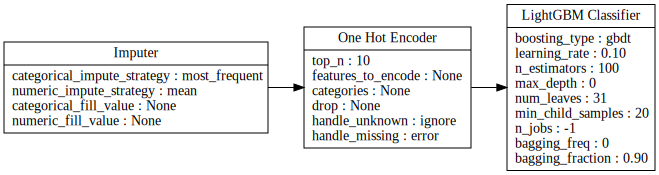

In [60]:
best_pipeline.graph()

In [61]:
best_pipeline.feature_importance

,feature,importance
0,DEM_POSTAL,573
1,DEM_AGE,475
2,DEM_HOME,145
3,DEM_EDU,139
4,DEM_INCOME,123
...,...,...
61,DEM_HEALTH_PRIV,0
62,DEM_HEALTH_PRE,0
63,DEM_HEALTH_OUT,0
64,DEM_HEALTH_OTH,0


In [62]:
best_pipeline.graph_feature_importance()

In [63]:
predictions = best_pipeline.predict(X_test)
predictions = predictions.to_series().to_list()

print ('Accuracy: ' + str(accuracy_score(y_test, predictions)))

Accuracy: 0.9148480385593788


In [64]:
confusion_matrix(y_test, predictions)

,0,1
0,0.928650,0.071350
1,0.564593,0.435407


In [65]:
graph_confusion_matrix(y_test, predictions)